In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
data= pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv', index_col='Date')
print(data.isna().sum())
data.dropna(inplace=True)
print(data.isna().sum().sum())

print(data.duplicated().any())
df=data['Close']

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64
0
False


In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data=df[0:training_size,:]
test_data=df[training_size:len(df),:1]

print(training_size,test_size)

958 517


In [126]:
#Creating train & test data 
def create_dataset(dataset, step_time=1):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_time-1):
		a = dataset[i:(i+step_time), 0]   
		data_X.append(a)
		data_Y.append(dataset[i + step_time, 0])
	return np.array(data_X), np.array(data_Y)

In [127]:
step_time = 50
X_train, y_train = create_dataset(train_data, step_time)
X_test, y_test = create_dataset(test_data, step_time)

print(X_train.shape), print(y_train.shape)

#tesorflow-LSTM model requires three dimentional array!
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

(907, 50)
(907,)


In [128]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [129]:
regressor =Sequential()
regressor.add(LSTM(30,return_sequences=True,input_shape=(50,1)))
regressor.add(LSTM(30,return_sequences=True))
regressor.add(LSTM(30))
regressor.add(Dense(1))
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [130]:
regressor.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

y_pred=regressor.predict(X_test)
y_pred=scaler.inverse_transform(y_pred)
y_test=y_test.reshape(y_test.shape[0],1)
y_test=scaler.inverse_transform(y_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)

rmse=(mse)**0.5
print(rmse)

Epoch 1/100
15/15 [==============================] - 6s 133ms/step - loss: 0.0194 - val_loss: 0.0665
Epoch 2/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0034 - val_loss: 0.0201
Epoch 3/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0016 - val_loss: 0.0200
Epoch 4/100
15/15 [==============================] - 1s 62ms/step - loss: 7.3283e-04 - val_loss: 0.0103
Epoch 5/100
15/15 [==============================] - 1s 62ms/step - loss: 4.9128e-04 - val_loss: 0.0059
Epoch 6/100
15/15 [==============================] - 1s 62ms/step - loss: 4.7449e-04 - val_loss: 0.0059
Epoch 7/100
15/15 [==============================] - 1s 63ms/step - loss: 4.6500e-04 - val_loss: 0.0059
Epoch 8/100
15/15 [==============================] - 1s 62ms/step - loss: 4.6753e-04 - val_loss: 0.0080
Epoch 9/100
15/15 [==============================] - 1s 62ms/step - loss: 4.8404e-04 - val_loss: 0.0074
Epoch 10/100
15/15 [==============================] - 1s 63ms/step - loss: 

15/15 [==============================] - 1s 63ms/step - loss: 2.0977e-04 - val_loss: 0.0026
Epoch 80/100
15/15 [==============================] - 1s 62ms/step - loss: 2.0546e-04 - val_loss: 0.0036
Epoch 81/100
15/15 [==============================] - 1s 62ms/step - loss: 2.3010e-04 - val_loss: 0.0032
Epoch 82/100
15/15 [==============================] - 1s 62ms/step - loss: 2.0307e-04 - val_loss: 0.0028
Epoch 83/100
15/15 [==============================] - 1s 62ms/step - loss: 2.0080e-04 - val_loss: 0.0030
Epoch 84/100
15/15 [==============================] - 1s 62ms/step - loss: 2.0284e-04 - val_loss: 0.0021
Epoch 85/100
15/15 [==============================] - 1s 63ms/step - loss: 2.2312e-04 - val_loss: 0.0013
Epoch 86/100
15/15 [==============================] - 1s 62ms/step - loss: 2.9145e-04 - val_loss: 0.0021
Epoch 87/100
15/15 [==============================] - 1s 61ms/step - loss: 2.1605e-04 - val_loss: 0.0031
Epoch 88/100
15/15 [==============================] - 1s 63ms/step -

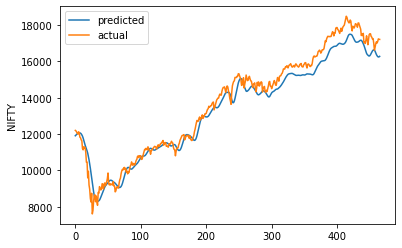

In [131]:
plt.plot(y_pred, label= "predicted")
plt.plot(y_test, label="actual")
plt.ylabel("NIFTY")
plt.legend()
plt.show()

In [132]:
print(len(test_data))
fut_inp=test_data[467:]
fut_inp=fut_inp.reshape(1,-1)
print(fut_inp.shape)

tmp_inp=list(fut_inp)
tmp_inp=tmp_inp[0].tolist()

517
(1, 50)


In [133]:
lst_output=[]
n_steps=50
i=0
while(i<40):
    
    if(len(tmp_inp)>50):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = regressor.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = regressor.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[[0.8170520067214966], [0.8167816400527954], [0.8117904663085938], [0.8030551075935364], [0.7916048169136047], [0.7782965898513794], [0.7637634873390198], [0.7484446167945862], [0.7326350808143616], [0.7165298461914062], [0.7002677321434021], [0.6839573383331299], [0.6676920056343079], [0.6515588164329529], [0.6356437802314758], [0.6200326681137085], [0.6048125624656677], [0.5900641083717346], [0.5758638381958008], [0.5622820854187012], [0.5493797063827515], [0.5372054576873779], [0.5258011817932129], [0.5151916742324829], [0.5053917765617371], [0.49639806151390076], [0.4882049858570099], [0.4807911515235901], [0.4741292893886566], [0.46818315982818604], [0.4629068076610565], [0.4582533836364746], [0.4541790783405304], [0.4506330192089081], [0.44756144285202026], [0.4449138343334198], [0.44263970851898193], [0.44069311022758484], [0.43902847170829773], [0.43760499358177185]]
